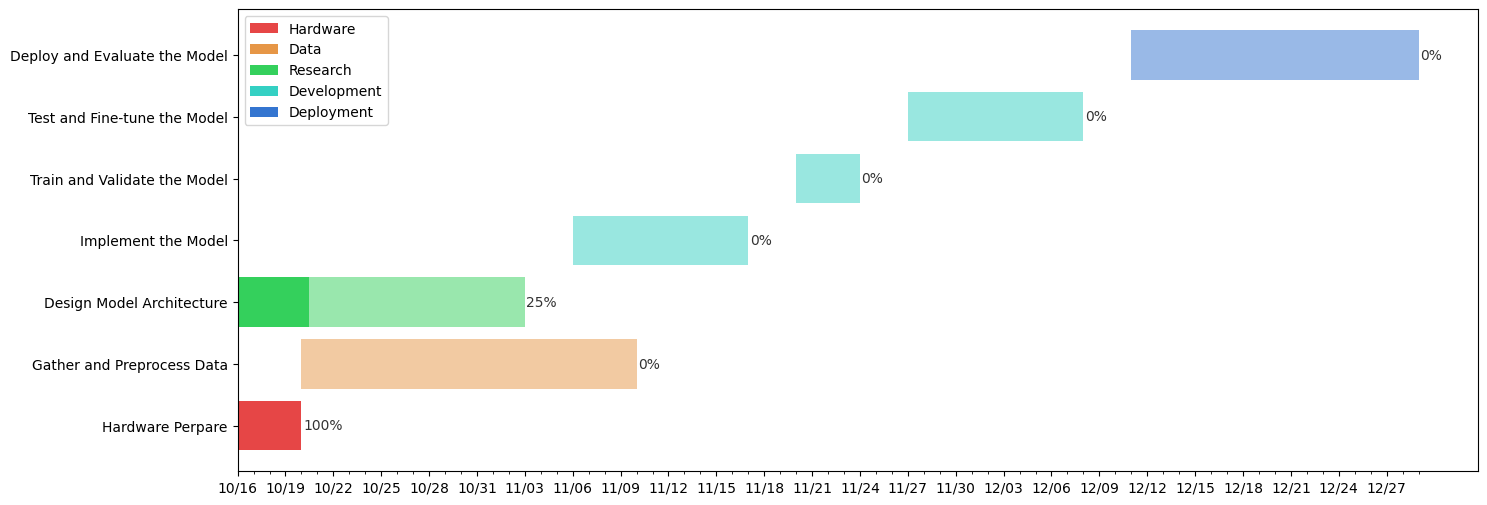

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('raodmap and schedule.xlsx')
# project start date
proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start - proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End - proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# create a column with the color for each department
def color(row):
    c_dict = {'Hardware':'#E64646',
               'Data':'#E69646', 
               'Research':'#34D05C',
               'Development':'#34D0C3',
               'Deployment':'#3475D0'}
    return c_dict[row['Phase']]
df['color'] = df.apply(color, axis=1)

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)
# texts
for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, 
            f"{int(row.Completion*100)}%", 
            va='center', alpha=0.8)
##### LEGENDS #####
c_dict = {'Hardware':'#E64646',
            'Data':'#E69646', 
            'Research':'#34D05C',
            'Development':'#34D0C3',
            'Deployment':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
plt.show()
